# Geometric Brownian Motion para 1 dimensão - Wiener process

o movimento Browniano é um conceito originado da física, mais especificamente de um problema para descrever o movimento aleatório de partículas em uma substância.

Entretanto, quando aplicada no mercado financeiro, na maioria dos casos consideramos apenas uma dimensão de entrada. Ou seja, apenas um valor relacionado ao Y.

Para resolver esse problema, e se adequar a uma dimensão, estou usando o processo Wiener, que é bastante utilizado em quant finance devido suas propriedades matematicas

Podemos utilizar o Geometric Brownian Motion (GBM) porque ele representa um processo estocástico continuo de series temporáis, onde a log das variaveis randomicas seguem o processo Wiener com uma drift.
Em outras palavras, o GBM consegue formular dados temporais sintéticos que possuem tendencias de queda ou subida com um determinado grau de volatilidade, se adequando quase perfeitamente para simular preços de ações


In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Agora vamos setar os parametros do nosso modelo

s0 = 131 # valor inicial da ação
sigma = 0.25 # volatilidade percentual
mu = 0.35 # retorno percentual - drift. Determina a tendência de crescimento do ativo

# Agora vamos definir o tempo de simulação
paths = 1000
delta = 1.0/252.0 # 252 dias úteis no ano. O delta é o intervalo de tempo entre cada iteração(frequência de amostragem)
time = 252*5 # 5 anos

In [30]:
# Retornar um array com o valor do ativo em cada iteração
def wiener_process(delta, sigma, time, paths):
    result = sigma * np.random.normal(loc=0, scale=np.sqrt(delta), size=(time, paths))
    return result

In [31]:
# Função para calcular os retornos do GBM
def gbm_returns(delta, sigma, time, mu, paths):
    process = wiener_process(delta, sigma, time, paths)

    result = np.exp(process + (mu - sigma**2/2)*delta)

    return result

In [32]:
# Agora, com o resultado acumulativo do processo de GBM, podemos calcular o valor do ativo multiplicando o preco inicial pelos retornos acumulados para produzir o preço do ativo em cada iteração
def gbm_levels(s0, delta, sigma, time, mu, paths):
    returns = gbm_returns(delta, sigma, time, mu, paths)

    stacked = np.vstack([np.ones(paths), returns])

    result = s0 * stacked.cumprod(axis=0)

    return result

## Vamos visualizar o resultado

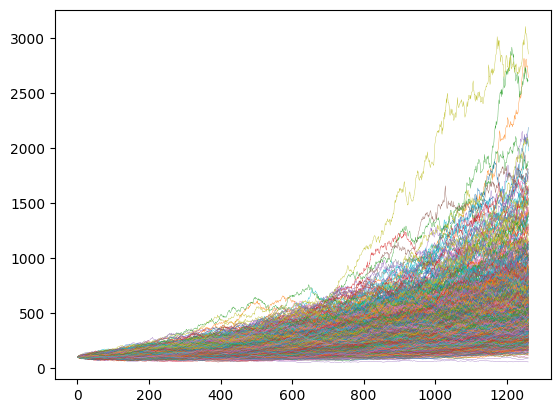

In [33]:
price_paths = gbm_levels(s0, delta, sigma, time, mu, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

Esse representação da Apple em 2021
- um preço incial de 131 dol
- uma volatilidade anualizada de 25%
- um retorno médio de 35% ao ano

Uma drift de 35% cria uma tendência positiva para maioria dos paths criados, podemos perceber a quantidade que simulações que foram positivas. Um total de 997 de 1000


In [34]:
len(price_paths[-1, price_paths[-1, :]> s0])

997

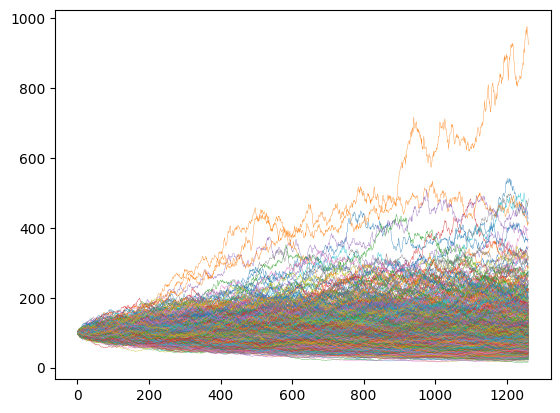

In [35]:
# Agora usando uma drift de 0
price_paths = gbm_levels(s0, delta, sigma, time, 0, paths)
plt.plot(price_paths, linewidth=0.25)
plt.show()

In [36]:
len(price_paths[-1, price_paths[-1, :]> s0])

404

Temos um caso muito diferente agora, com apenas 402 dos 1000 paths sendo positivos